In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('../Datasets/cleaned_reviews.csv')
df.shape

(17340, 4)

In [4]:
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [5]:
df = df.dropna()

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17334    False
17335    False
17336    False
17337    False
17339    False
Length: 15990, dtype: bool

# Text Length Analysis

In [9]:
df['review_length'] = df['cleaned_review'].apply(len)

In [10]:
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score,review_length
0,positive,i wish would have gotten one earlier love it a...,19,5.0,93
1,neutral,i ve learned this lesson again open the packag...,88,1.0,460
2,neutral,it is so slow and lags find better option,9,2.0,41
3,neutral,roller ball stopped working within months of m...,12,1.0,71
4,neutral,i like the color and size but it few days out ...,21,1.0,94


In [11]:
df['review_length'].describe()

count    15990.000000
mean       165.056410
std        192.544511
min          1.000000
25%         51.000000
50%        108.000000
75%        208.000000
max       3252.000000
Name: review_length, dtype: float64

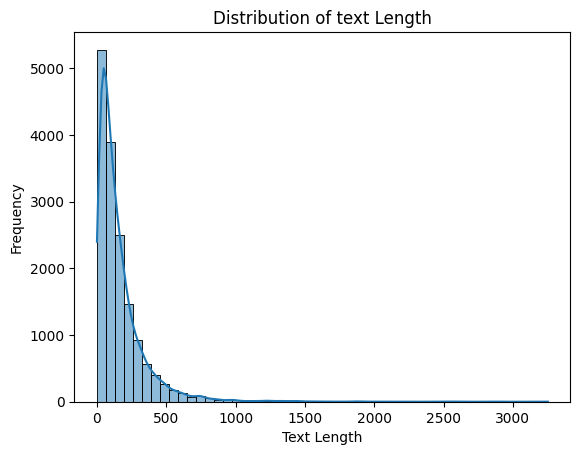

In [13]:
sns.histplot(data=df,x= 'review_length',bins=50,kde = True)
plt.title('Distribution of text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Word Frequency 

In [16]:
from collections import Counter 
import re 

# Function to clean text and extract words
def get_words(text):
    text = text.lower() # COnvert to lower case
    text = re.sub(r'[^a-zA-Z\s]','',text) # Remove Special characters
    words = text.split()
    return words

# Get all words from the dataset
all_words = df['cleaned_review'].apply(get_words).sum()
# Count word frequencies
word_counts = Counter(all_words)
#Display the most common words
print(word_counts.most_common(10))

[('the', 25196), ('it', 21988), ('and', 16675), ('to', 12547), ('for', 9503), ('is', 9264), ('this', 8208), ('my', 6368), ('mouse', 5828), ('of', 5307)]


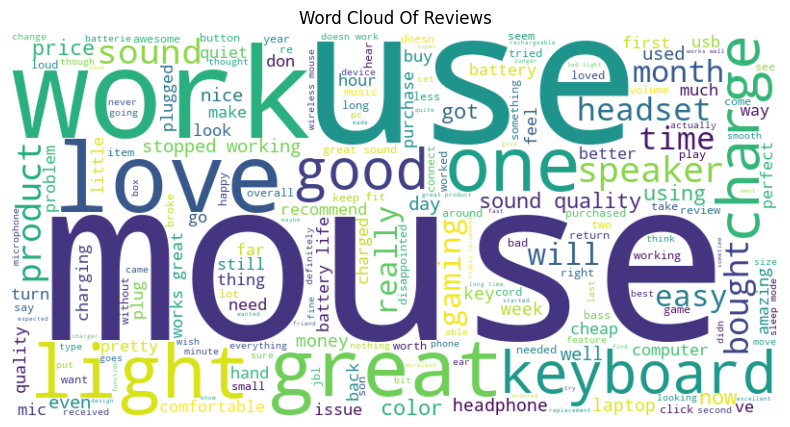

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Of Reviews')
plt.show()

In [18]:
df1 = pd.read_csv('../Datasets/news_dataset.csv')
df1.shape

(3729, 2)

In [19]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3724     True
3725     True
3726    False
3727    False
3728     True
Length: 3729, dtype: bool

In [20]:
df1 = df1.dropna()

In [21]:
df1 = df1.drop_duplicates()

In [22]:
df1.isnull().sum()

label    0
text     0
dtype: int64

In [23]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3719    False
3720    False
3722    False
3726    False
3727    False
Length: 2229, dtype: bool

In [24]:
df1.shape

(2229, 2)

In [26]:
df1.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [30]:
df1['text_length'] = df1['text'].apply(len)

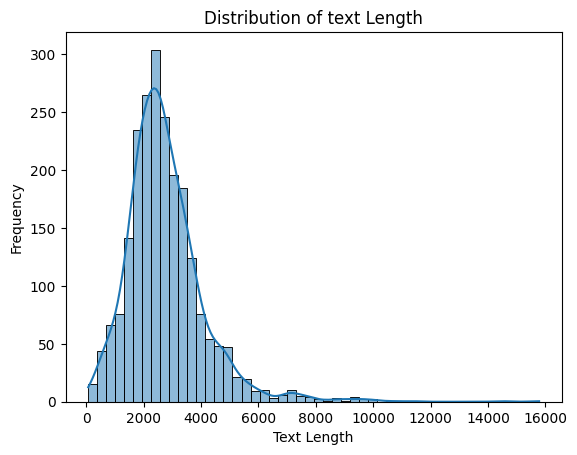

In [31]:
sns.histplot(data=df1,x= 'text_length',bins=50,kde = True)
plt.title('Distribution of text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [32]:
from collections import Counter 
import re 

# Function to clean text and extract words
def get_words(text):
    text = text.lower() # COnvert to lower case
    text = re.sub(r'[^a-zA-Z\s]','',text) # Remove Special characters
    words = text.split()
    return words

# Get all words from the dataset
all_words_2 = df1['text'].apply(get_words).sum()
# Count word frequencies
word_counts = Counter(all_words_2)
#Display the most common words
print(word_counts.most_common(10))

[('the', 71500), ('of', 26504), ('a', 25790), ('in', 21995), ('to', 21539), ('and', 20505), ('on', 14074), ('is', 12540), ('that', 12472), ('was', 8721)]


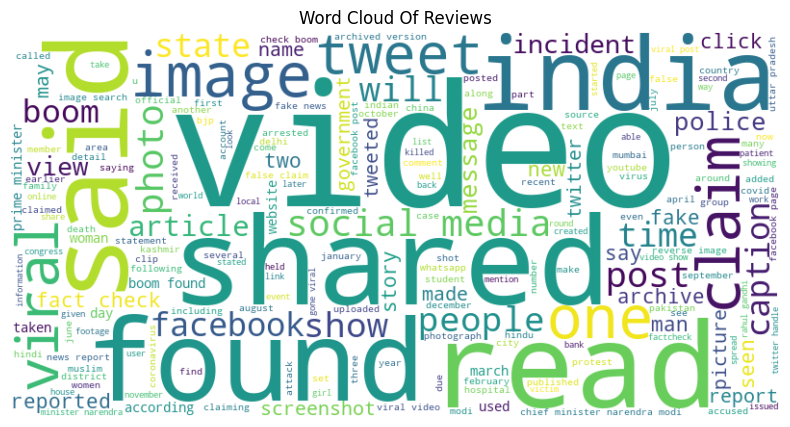

In [33]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words_2))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Of Reviews')
plt.show()